## Algoritmos de Clasificación (Parte I)
## Actividad 3: Clasificación con NaiveBayes
### Sebastián Contreras Zambrano

* Para poder realizar esta actividad debes haber revisado la lectura correspondiente a lasemana.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminada la actividad, comprime la carpeta y sube el .zip a la seccióncorrespondiente

## Descripción de Actividades
* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales dedistintos artistas. 
* Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista,el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividadtrabajaremos con un Multinomial Naive Bayes.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos numpy, pandas, matplotlib, seaborn, glob y os siguiendo lasbuenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiplesarchivos dentro de la carpeta dump.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dumputilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormentegenere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna `Unnamed: 0` que se genera por defecto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns
from sklearn.metrics import *

In [3]:
# generamos una lista con todos los csv existentes
file_list = glob.glob(os.getcwd() + '/dump/*.csv')
# lista vacía

append_csv = []
# para cada csv
for f in file_list:
    # abrir en pandas y concatenar
    append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))
# concatenar la lista de dataframes


df_lyrics = pd.concat(append_csv)
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [4]:
display(df_lyrics.head())
df_lyrics.shape

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \r\n Winged st..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \r\n In a street machine ...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \r\n Lines for...
3,Anthrax,metal,Panic,Move it to the front \r\n Reaching for the lig...
4,Anthrax,metal,Subjugator,Out in the streets \r\n We're fighting tonight...


(9489, 4)

## Ejercicio 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias

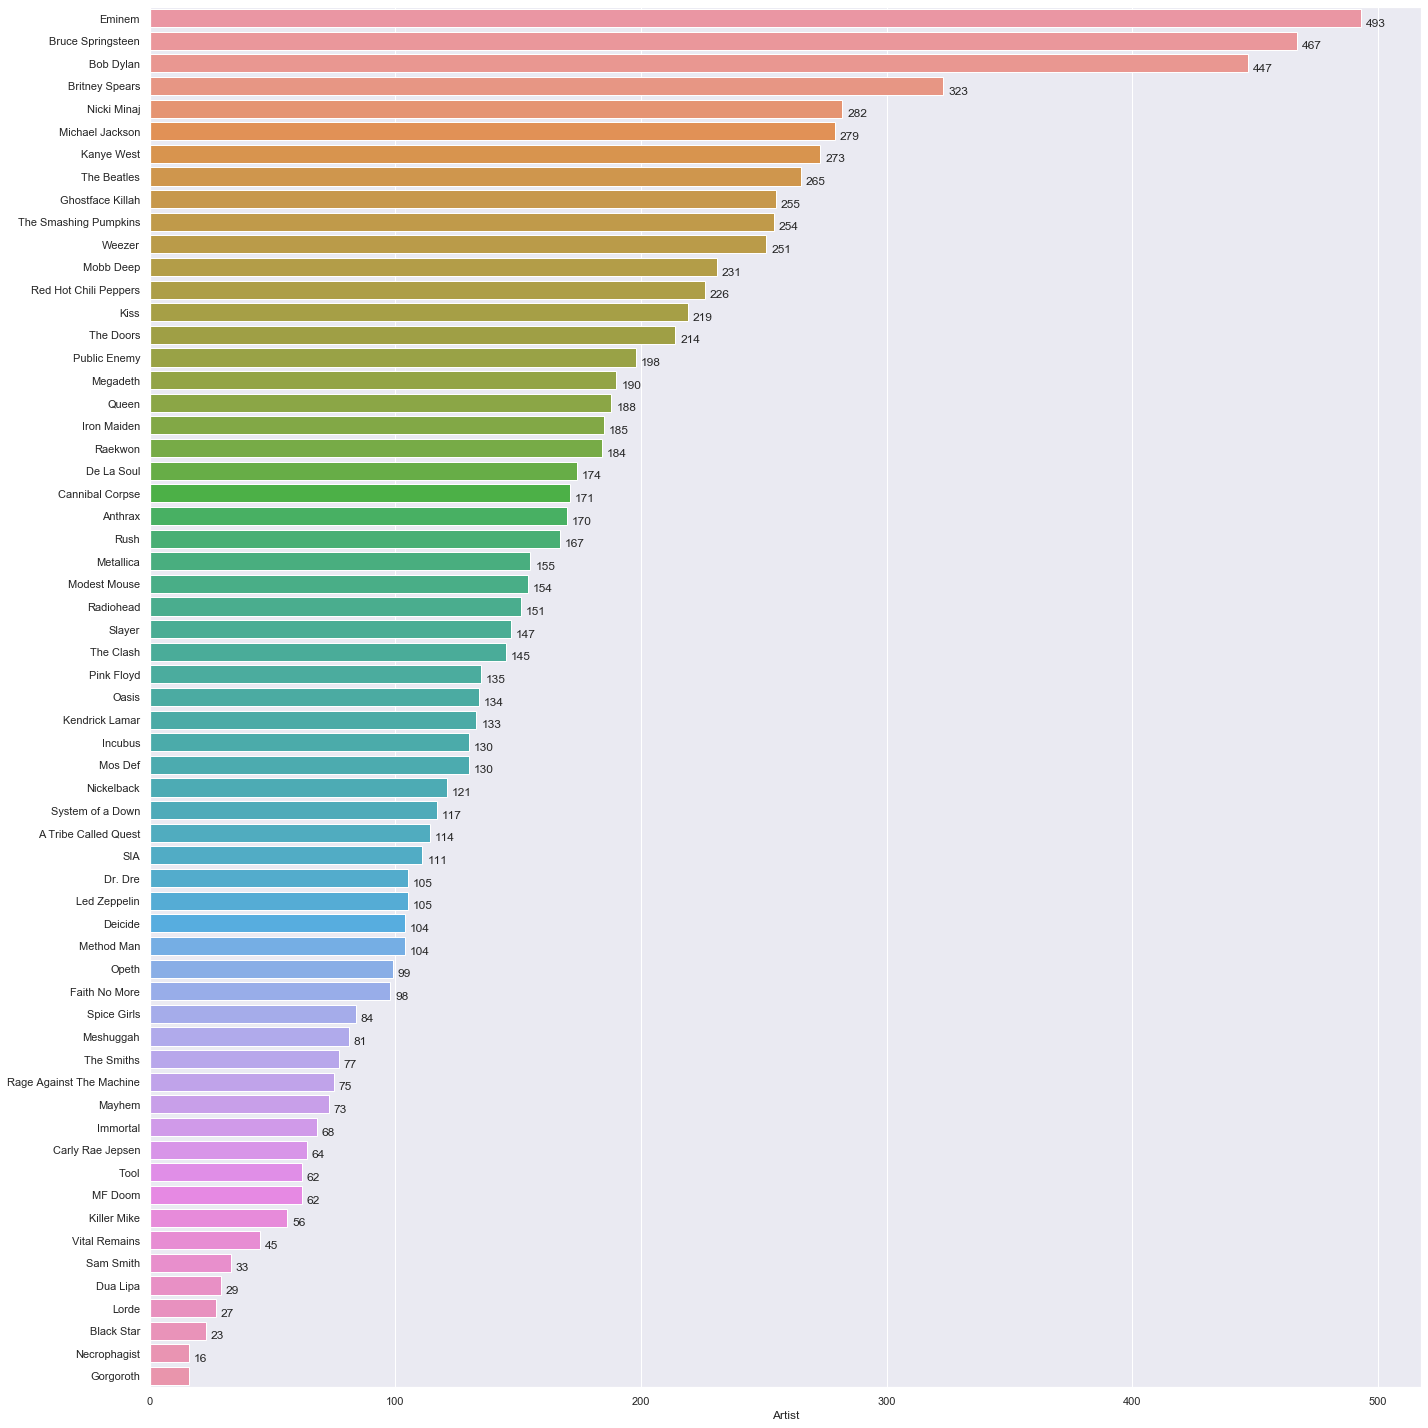

In [5]:
df_artist = pd.DataFrame(df_lyrics['Artist'].value_counts())
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.barplot(y=df_artist.index, x=df_artist['Artist'], data=df_artist)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

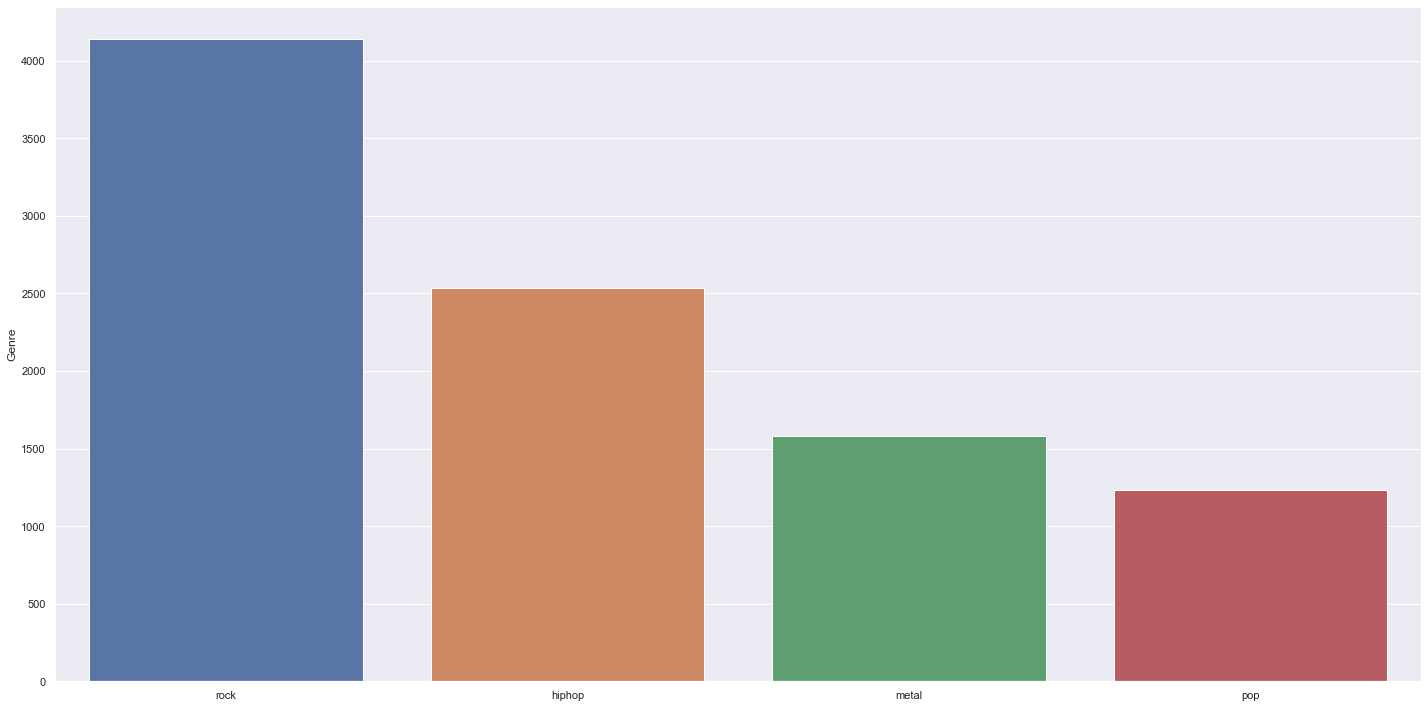

In [6]:
df_genre = pd.DataFrame(df_lyrics['Genre'].value_counts())
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.barplot(x=df_genre.index, y=df_genre['Genre'], data=df_genre)
plt.tight_layout()
plt.show()

## Ejercicio 3: Matriz de ocurrencias
* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de estaclase?
* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [8]:
cv = CountVectorizer(stop_words='english')

In [9]:
cv_fit = cv.fit_transform(df_lyrics['Lyrics'])

#### Extraer tokens del corpus

In [10]:
words = cv.get_feature_names()

In [11]:
word_freq = cv_fit.toarray().sum(axis=0)

In [12]:
words_df = pd.DataFrame({'words': words, 'freq': word_freq})

In [13]:
words_df.sort_values(by='freq', ascending=False).head(10)

,words,freq
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
25479,love,11268
48591,yeah,11071
25165,ll,10028
29851,oh,9879
7009,cause,8356


In [14]:
def words_freq(dataframe, columna):
    tmp_cv = CountVectorizer(stop_words='english')
    tmp_cv_fit = tmp_cv.fit_transform(dataframe[columna])
    tmp_words = tmp_cv.get_feature_names()
    tmp_word_freq = tmp_cv_fit.toarray().sum(axis=0)
    tmp_words_df = pd.DataFrame({'words': tmp_words, 'freq': tmp_word_freq})
    tmp_words_df = tmp_words_df.sort_values(by='freq', ascending=False)
    return tmp_words_df

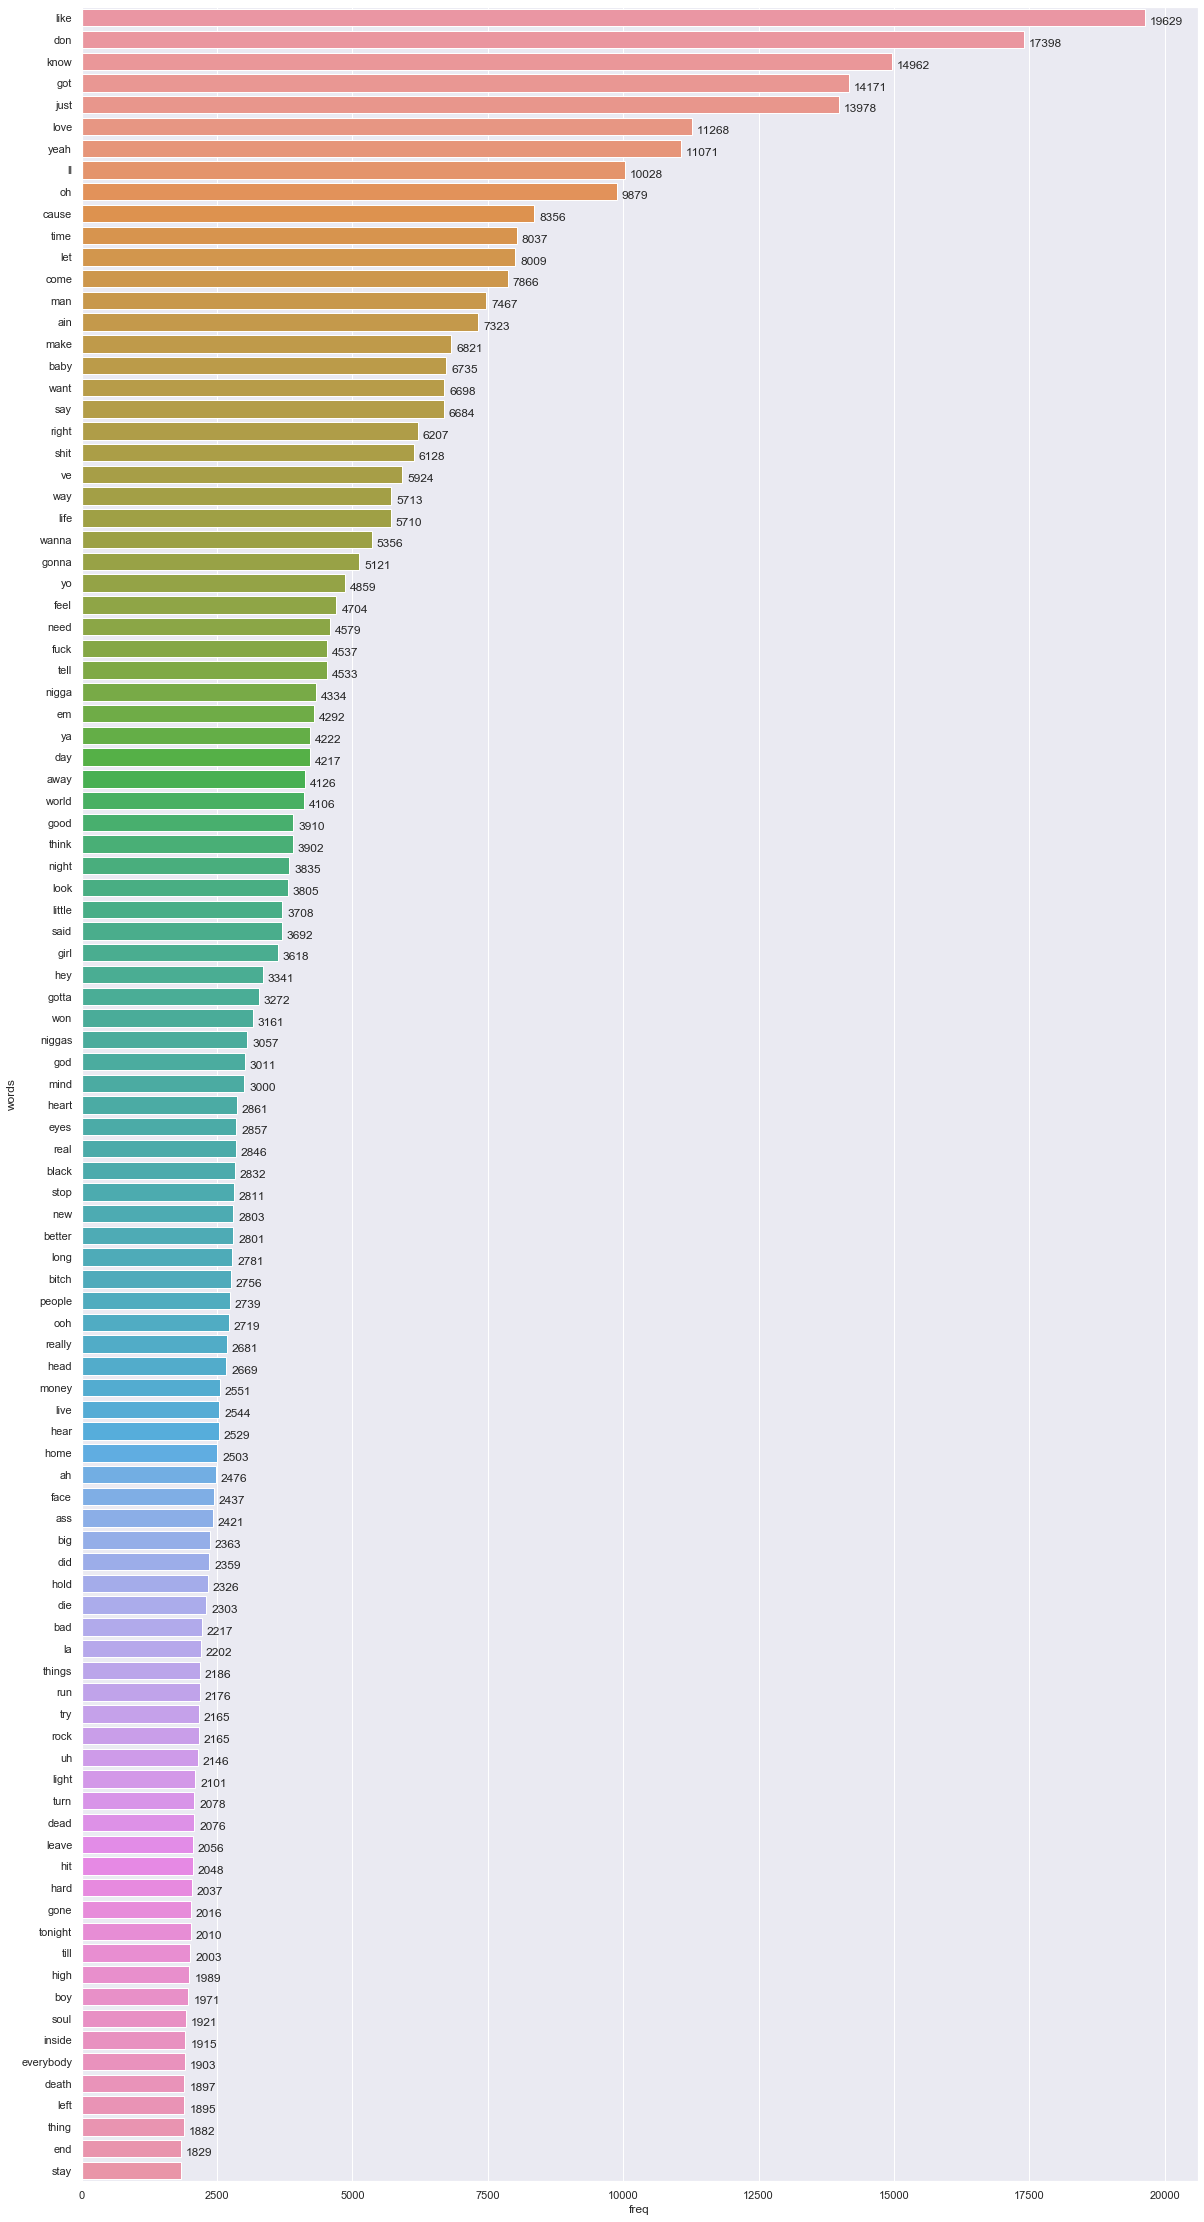

In [15]:
plt.figure(figsize=(20,40))
sns.set(style="darkgrid")
tmp_df = words_df.sort_values(by='freq', ascending=False).head(100)
ax = sns.barplot(y=tmp_df['words'], x=tmp_df['freq'], data=words_df)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')
plt.show()

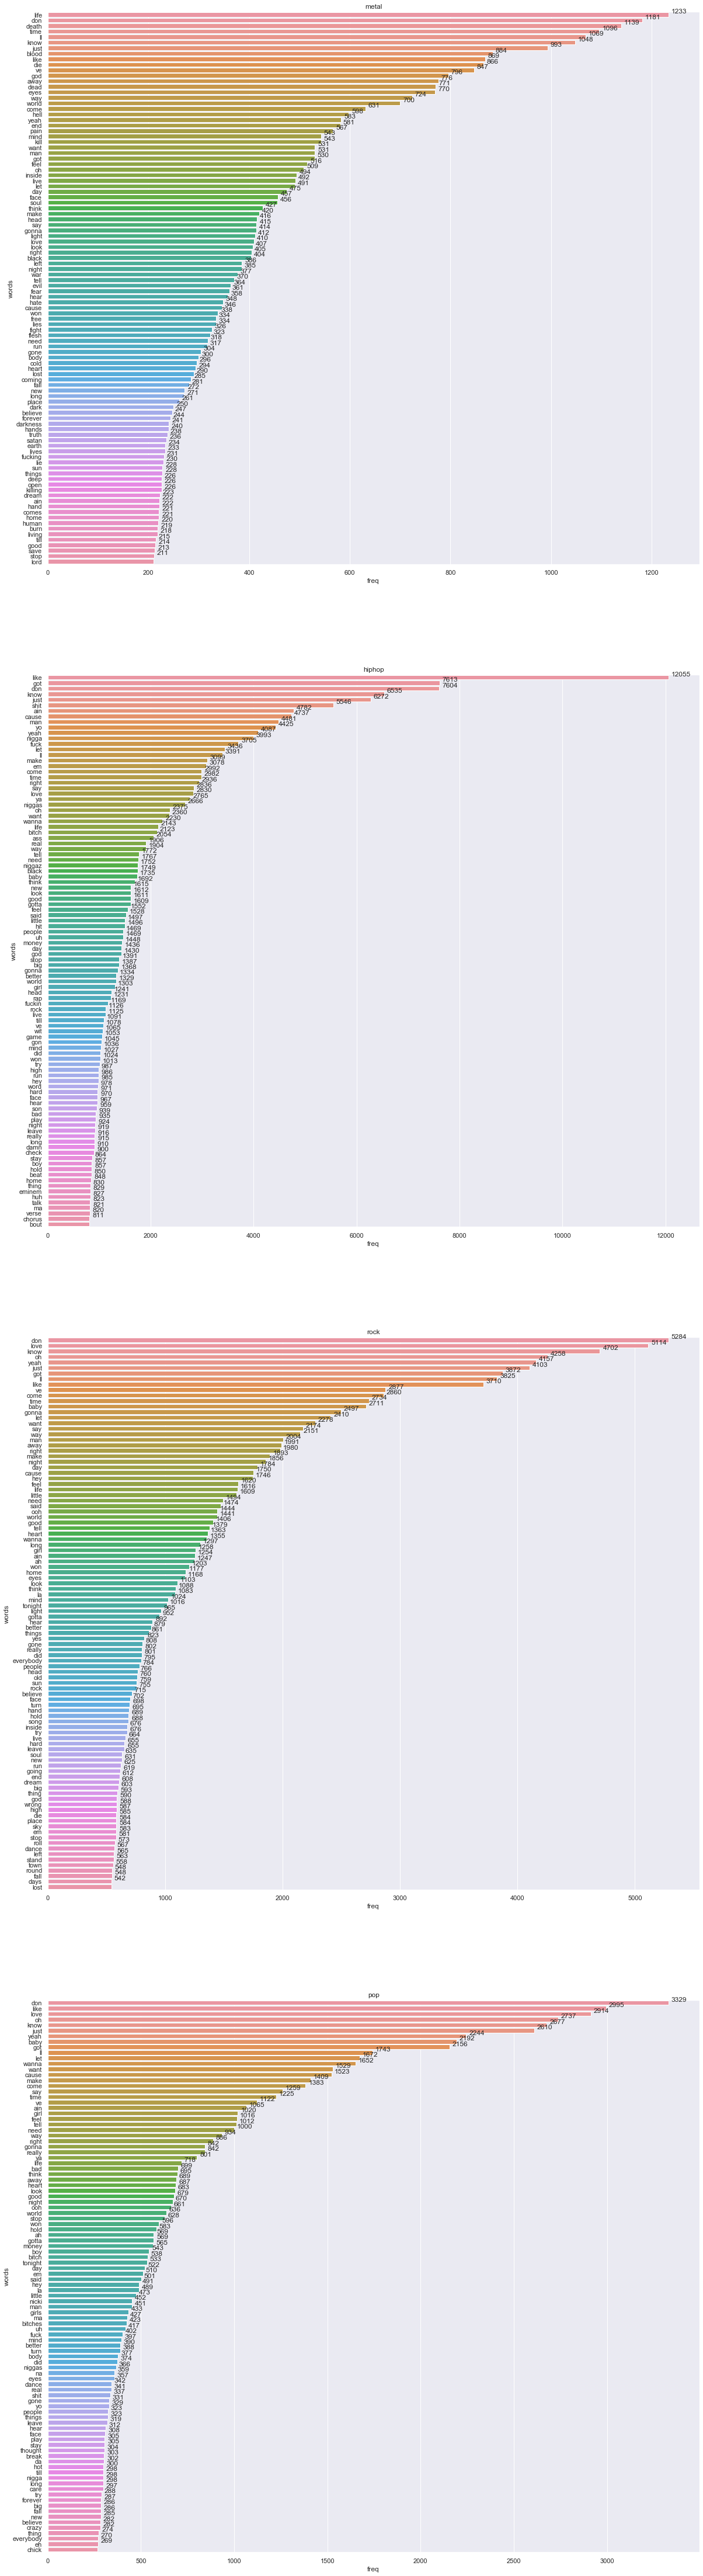

In [16]:
plt.figure(figsize=(20,80))
sns.set(style="darkgrid")

for index, genre in enumerate(df_lyrics['Genre'].unique()):
    tmp_df_gen = words_freq(df_lyrics[df_lyrics['Genre']==genre], 'Lyrics')
    plt.subplot(4,1, index+1)
    
    tmp_df_gen = tmp_df_gen.sort_values(by='freq', ascending=False).head(100)
    ax = sns.barplot(y=tmp_df_gen['words'], x=tmp_df_gen['freq'], data=tmp_df_gen)
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                    xytext=(5, 10), textcoords='offset points')
    plt.title(genre)

plt.show()

## Ejercicio 4: Entrenamiento del Modelo
* Importe `MultinomialNB`, `train_test_split`, `Pipeline`, `confusion_matrix` y `classification_report`.
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un `Pipeline`, donde el primer paso es implementar `CountVectorizer` y el segundo sea ejecutar el clasificador `MultinomialNB`.
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?
* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],
                                                  df_lyrics['Genre'],
                                                  test_size=.40,
                                                  random_state=250992)
text_classifier = Pipeline(
    [
        ('vectorizer', CountVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
    ]
)

text_classifier.fit(X_train, y_train)
y_hat = text_classifier.predict(X_test)

#### Algunas pruebas para ver cómo funciona el modelo

In [18]:
text_to_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
                  'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
                  "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
                  'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
                  'Sexual violence doesnt start and end with rape It starts in our books and behind our school gates', # IDLES - Mother,
                  "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
                  build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
                  You are not deserving, you are not deserving" #Banks - Drowning
                 ]

In [19]:
text_classifier.predict(text_to_predict)

array(['rock', 'metal', 'rock', 'hiphop', 'metal', 'rock'], dtype='<U6')

In [20]:
canciones = ['Brody Dalle - Underworld', 'Gorguts - Forgotten Arrows', 'NSYNC - Bye Bye Bye', 'Ludacris - Move B*tch', 'IDLES - Mother', 'Banks - Drowning']

In [21]:
jamiroquai = ["""She's just a cosmic girl
            From another galaxy
            My heart's at zero gravity
            She's from a cosmic world
            Putting me in ecstasy
            Transmitting on my frequency
            She's cosmic"""]

In [22]:
text_classifier.predict(jamiroquai)

array(['rock'], dtype='<U6')

In [23]:
kendrick= ["""Say, say say
            I come from murder one, brung late night melee
            Say, say, say
            We hung all summer, sprung mattress with bae bae
            Say, say, say
            Trippin' off dyke, and my name strike with pay day
            Say, say, say
            Flippin' blue lighting, tightening, strapped with AK
            Say, say, say
            OG one, told me one, show me one, eight ways
            How to segue
            Pussy, power, profit and headache
            I reminisce my life innocence
            Or life innocent
            Or life intimate, with fame
            Like limo tint
            With light women, dark women in it
            Aw Kenny, good game
            She wanna hang with a Starboy
            The sun and the moon and star, boy
            Astronomer, anonymous
            I line 'em up, grind 'em up, these nine of us
            And five of us have probably fucked
            She mollied up, I tallied up all the parts, boy
            Twenty legs, arms, head (head)
            Head, head, more head (head)
            Oh God bless the dead (yeah)
            I'm livin' life, high off life
            I wear my chokes off to bed
            I'm the greatest nigga, why you so scared to say it?
            I wanna rock, I wanna rock, I wanna cop more land
            I never stop
            I wanna quick advance on a bill if it ain't one
            Break everything, I'm a hustler, came from"""]

In [24]:
text_classifier.predict(kendrick)

array(['hiphop'], dtype='<U6')

Al parecer no clasifica las canciones de manera correcta, se verificarán las métricas de este.

In [25]:
from sklearn.metrics import classification_report
from collections import defaultdict

def cr_to_df(y_true,y_pred, avg_measures=False):
    
    """
    Función que retorna un Dataframe de pandas a partir de un classification report de la librería sklearn, módulo metrics
    """
    
    cr = classification_report(y_true, y_pred)
    tmp = []
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)

    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            try:
                D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
            except:
                pass
    tmp_df = pd.DataFrame(D_class_data).T
    columnsTitles = ['precision', 'recall', 'f1-score', 'support']
    tmp_df = tmp_df.reindex(columns=columnsTitles)
    
    if avg_measures is False:
        tmp_df = tmp_df.drop(['accuracy', ' macro avg','weighted avg'])
    
    return tmp_df

In [26]:
metricas = cr_to_df(y_test, y_hat)
display (metricas)

,precision,recall,f1-score,support
hiphop,0.84,0.92,0.88,1023.0
metal,0.82,0.70,0.76,618.0
pop,0.71,0.36,0.48,520.0
rock,0.75,0.86,0.80,1635.0


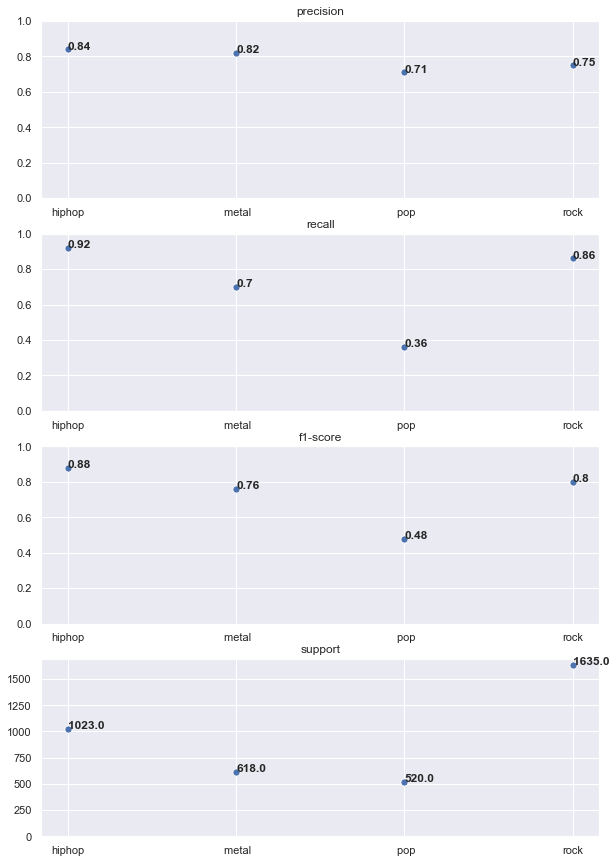

In [27]:
plt.figure(figsize=(10,15))
sns.set(style="darkgrid")

for index, (colname, serie) in enumerate (metricas.iteritems()):
    plt.subplot(4,1,index+1)
    sc = sns.scatterplot(x = metricas[colname].index, y=metricas[colname].values, 
                     palette='dodgerblue', s=50)
    for a,b in zip(metricas[colname].index,metricas[colname].values):
        plt.text(a, b, str(b), fontweight ='bold')
    
    if colname != 'support':
        sc.set(ylim=(0, 1))
    else:
        sc.set(ylim=(0, None))
    plt.title(colname)
plt.show()

* La métrica `Precision` nos indica que para la categoría `hiphop` existieron mayores casos de identificaciones positivas correctas con un __86%__, mientras que la categoría `pop` fue la que obtuvo peor puntación, con un __66%__.


* La métrica `Recall` nos indica que para la categoría `hiphop` un __92%__ de positivos reales se identificó correctamente, mientras que la categoría `pop` solo un __40%__ de positivos reales se identificó correctamente. 


* En cuanto a la métrica `f1-score`, podemos observar que el modelo tiene un __89%__ de éxito al identificar la categoría `hiphop`, mientras que nuevamente la categoría `pop` obtiene el peor puntaje, con un __50%__ de éxito de identificación.

* El soporte indica el número de ocurrencias de cada clase en particular en las respuestas verdaderas, el cual es más alto para la categoría `rock`

## Ejercicio 5: Mejora del Modelo
* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peoresmétricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
* Comente sobre el desempeño general de éste.

En base las métricas previamente analizadas, una mejora para el modelo sería __agregar más datos__, con el objetivo de que el modelo aprenda a clasificar las canciones con una mayor precisión. 

In [28]:
file_list = glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')
append_csv = []
for f in file_list:
    # abrir en pandas y concatenar
    append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))
# concatenar la lista de dataframes


df_lyrics_2 = pd.concat(append_csv)
df_lyrics_2.columns = ['Artist', 'Genre', 'Song', 'Lyrics']
df_lyrics_2.shape

(10804, 4)

In [29]:
df_lyrics_2['Genre'].value_counts()

rock      4140
pop       2547
hiphop    2535
metal     1582
Name: Genre, dtype: int64

In [30]:
df_lyrics['Genre'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: Genre, dtype: int64

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_lyrics_2['Lyrics'],
                                                  df_lyrics_2['Genre'],
                                                  test_size=.40,
                                                  random_state=250992)
text_classifier_2 = Pipeline(
    [
        ('vectorizer', CountVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
    ]
)

text_classifier_2.fit(X_train_2, y_train_2)
y_hat_2 = text_classifier.predict(X_test_2)

In [32]:
canciones

['Brody Dalle - Underworld',
 'Gorguts - Forgotten Arrows',
 'NSYNC - Bye Bye Bye',
 'Ludacris - Move B*tch',
 'IDLES - Mother',
 'Banks - Drowning']

In [33]:
text_classifier.predict(text_to_predict) #modelo con menos datos

array(['rock', 'metal', 'rock', 'hiphop', 'metal', 'rock'], dtype='<U6')

In [34]:
text_classifier_2.predict(text_to_predict) #modelo entrenado con más datos

array(['rock', 'metal', 'pop', 'pop', 'metal', 'pop'], dtype='<U6')

In [35]:
mj = ["""Do you remember the time
When we fell in love
Do you remember the time
When we first met
Do you remember the time
When we fell in love
Do you remember the time
Remember the times
Ooh
Remember the times
Do you remember girl
Remember the times
On the phone you and me
Remember the times
Till dawn, two or three
What about us girl"""]

In [36]:
text_classifier.predict(mj)

array(['rock'], dtype='<U6')

In [37]:
text_classifier_2.predict(mj)

array(['pop'], dtype='<U6')

Al analizar la diferencias entre los resultados, podriamos decir que _a criterio humano_ existe una mejora, ya que clasifica correctamente la canción de __NSYNC - Bye Bye Bye__ y __Remember the Time - Michael Jackson__ en comparación al primer modelo, para verificar si esta mejora existe a nivel estadístico, se compará con las métricas `precision`, `recall`, `f1-score` y `support`.

In [38]:
metricas_2 = cr_to_df(y_test_2, y_hat_2)
print("Modelo 1")
display (metricas)
print("Modelo 2")
display (metricas_2)

Modelo 1


,precision,recall,f1-score,support
hiphop,0.84,0.92,0.88,1023.0
metal,0.82,0.70,0.76,618.0
pop,0.71,0.36,0.48,520.0
rock,0.75,0.86,0.80,1635.0


Modelo 2


,precision,recall,f1-score,support
hiphop,0.84,0.94,0.89,989.0
metal,0.88,0.75,0.81,594.0
pop,0.89,0.39,0.54,1046.0
rock,0.70,0.92,0.79,1693.0


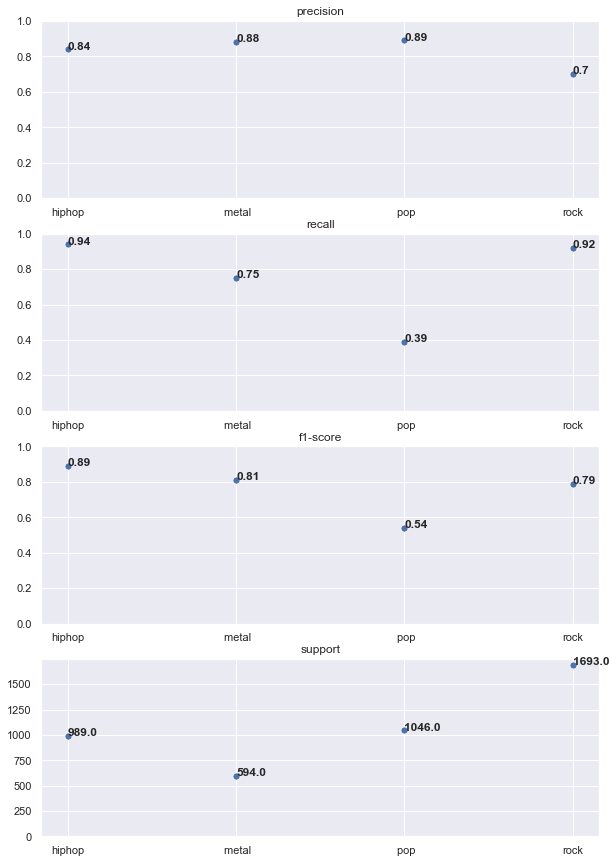

In [39]:
plt.figure(figsize=(10,15))
sns.set(style="darkgrid")

for index, (colname, serie) in enumerate (metricas_2.iteritems()):
    plt.subplot(4,1,index+1)
    sc = sns.scatterplot(x = metricas_2[colname].index, y=metricas_2[colname].values, 
                     palette='dodgerblue', s=50)
    for a,b in zip(metricas_2[colname].index,metricas_2[colname].values):
        plt.text(a, b, str(b), fontweight ='bold')
    
    if colname != 'support':
        sc.set(ylim=(0, 1))
    else:
        sc.set(ylim=(0, None))
    plt.title(colname)
plt.show()

#### Al comparar las métricas obtenidas por el nuevo modelo entrenado vs el anterior, podemos realizar las siguientes observaciones:

En general, se puede apreciar que el nuevo modelo obtiene mejores métricas que el anterior, y que los principales cambios fueron para las categorías `pop` y `rock`, existiendo un intercambio entre las canciones que el modelo anteriormente clasificaba como `rock` y pertenecian al género `pop`.